In [2]:
#Brendon McHugh PHY408 Lab 0
#1.1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

a = 1 + 5
b = 2
c = a + b
print(a / b)
print(a // b)
print(a - b)
print(a * b)
print(a**b)

3.0
3
4
12
36


In [3]:
a = np.array([[3, 1],
[1, 3]])
b = np.array([[3],
[5]])
print(a * b)
print(np.dot(a, b))
print(np.dot(b.T, a))
c = a**(-1.0)

[[ 9  3]
 [ 5 15]]
[[14]
 [18]]
[[14 18]]


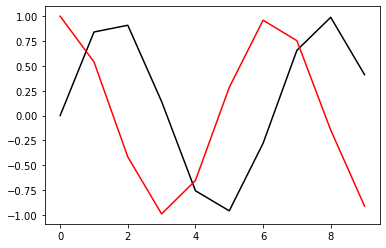

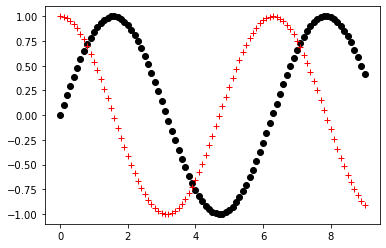

In [5]:
t = np.arange(10)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'k', t, h, 'r');
t = np.arange(0, 9.1, 0.1)
g = np.sin(t)
h = np.cos(t)
plt.figure()
plt.plot(t, g, 'ok', t, h, '+r');

[ 0.          0.52631579  1.05263158  1.57894737  2.10526316  2.63157895
  3.15789474  3.68421053  4.21052632  4.73684211  5.26315789  5.78947368
  6.31578947  6.84210526  7.36842105  7.89473684  8.42105263  8.94736842
  9.47368421 10.        ]
[1.00230524e+00 1.78186583e+01 3.16774344e+02 5.63151182e+03
 1.00115196e+05 1.77981556e+06 3.16409854e+07 5.62503203e+08
 1.00000000e+10]
[1.00000000e-03 3.16227766e-03 1.00000000e-02 3.16227766e-02
 1.00000000e-01 3.16227766e-01 1.00000000e+00 3.16227766e+00
 1.00000000e+01]


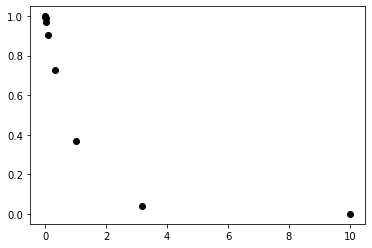

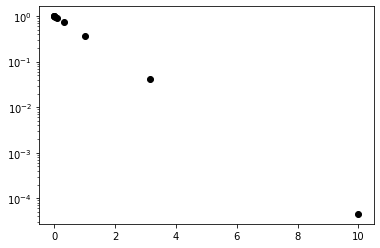

In [6]:
t = np.linspace(0, 10, 20)
print(t)
t = np.logspace(0.001, 10, 9)
print(t)
t = np.logspace(-3, 1, 9)
print(t)
y = np.exp(-t)
plt.figure()
plt.plot(t, y, 'ok')
plt.figure()
plt.semilogy(t, y, 'ok') #Make a plot with log scaling on the y axis

In [7]:
#1.2
def integral(y, dx):
# function c = integral(y, dx)
# To numerically calculate integral of vector y with interval dx:
# c = integral[ y(x) dx]
# ------ This is a demonstration program ------
    n = len(y) # Get the length of vector y
    nx = len(dx) if np.iterable(dx) else 1
    c = 0 # initialize c because we are going to use it
    # dx is a scalar <=> x is equally spaced
    if nx == 1: # ==, equal to, as a condition
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx / 2
# x is not equally spaced, then length of dx has to be n-1
    elif nx == n-1:
        for k in range(1, n):
            c = c + (y[k] + y[k-1]) * dx[k-1] / 2
# If nx is not 1 or n-1, display an error messege and terminate program
    else:
        print('Lengths of y and dx do not match!')
    return c

0.999979020750832


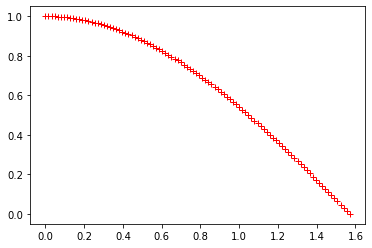

In [8]:
# number of samples
nt = 100
# generate time vector
t = np.linspace(0, 0.5*np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
plt.plot(t, y, 'r+')
c = integral(y, dt)
print(c)

(1.2.1) Part 1: First plot y(t). Is the output c value what you are expecting for ∫ cos(t)dt from 0 to pi/2? How can you improve the accuracy of your computation?

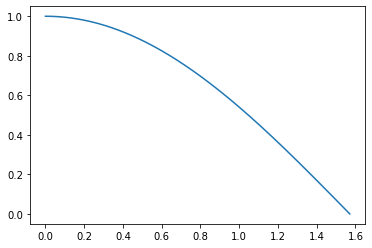

In [9]:
#plot of y(t)=cos(t)
t=np.linspace(0,np.pi/2, 1000)
y=np.cos(t)
plt.figure()
plt.plot(t, y)
plt.show()

The output value of c is not exactly what I'd expect, since the exact answer is actually. Of course the reason for this is that we are only approximating the integral using nt=100 samples. To improve the accuracy, we could use a higher number of samples. The code below demonstrates this increased accuracy using nt=100000:

In [10]:
# number of samples
nt = 100000
# generate time vector
t = np.linspace(0, 0.5*np.pi, nt)
# compute sample interval (evenly sampled, only one number)
dt = t[1] - t[0]
y = np.cos(t)
c = integral(y, dt)
print(c)

0.9999999999794388



(1.2.2) Part 2: For an unevenly spaced time series that depicts sin 2π(t + 2 ∗ t2), compute∫ sin[2π(t + 2 ∗ t2)]dt from 0 to 1. (saved as uneven.py).Show your plot of y(t) (for nt = 50). Try different nt values and see how the integral results change. Write a for loop around the statements above to try a series of nt values (e.g, 20, 50, 100, 500, 1000, 2000) and generate a plot of c(nt). What value does c converge to after using larger and larger nt? (Please include your modified Python code.)

0.09103091619504072
0.0902642183694504
0.09016167964797903
0.09012966378052621
0.09012867788647684
0.09012843193269807
0.0901283533197461


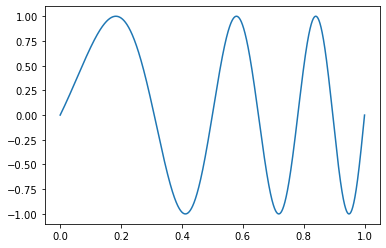

In [15]:
for i in [20,50,100,500,1000,2000,10000]:
    nt = i
# sampling between [0,0.5]
    t1 = np.linspace(0, 0.5, nt)
# double sampling between [0.5,1]
    t2 = np.linspace(0.5, 1, 2*nt)
# concatenate time vector
    t = np.concatenate((t1[:-1], t2))
# compute y values
    y = np.sin(2 * np.pi * (t + 2 * t**2))
# compute sampling interval vector
    dt = t[1:] - t[:-1]
    c = integral(y, dt)
    print(c)
    
#plot for nt=50
nt=50
plt.plot(t, y)
plt.show()

The value that c converges to after using larger and larger nt is approximately 0.090128.

(1.3) Accuracy of sampling
Let us sample the function g(t) = sin(2πft) at sampling interval dt = 1, for frequency values of f = 0, 0.25, 0.5, 0.75, 1.0 hertz. In each case, plot on the screen the points of the resulting time series (as isolated red crosses) to
see how well it approximates g(t) (plotted as a blue-dotted line, try a very small dt fine sampling). Submit only plots for frequencies of 0.25 and 0.75 Hertz, use xlabel, ylabel, title commands to annotate each plot. For each frequency that you investigated, do you think the sampling time
series is a fair representation of the original time series g(t)? What is the apparent frequency for the sampling time series? (Figure out after how many points (N) the series repeats itself, then the apparent frequency = 1/(N*dt). You can do this either mathematically or by inspection. A flat time series has apparent frequency = 0.) Can you guess with a sampling interval of dt = 1, what is the maximum frequency f of g(t) such that it can be fairly represented by the discrete time series? (Please attach your Python code.)

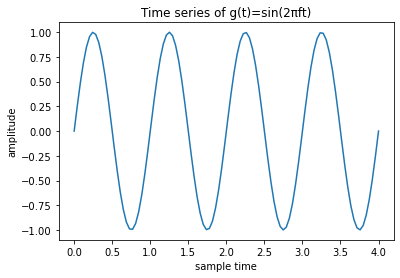

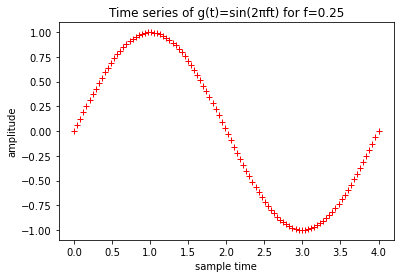

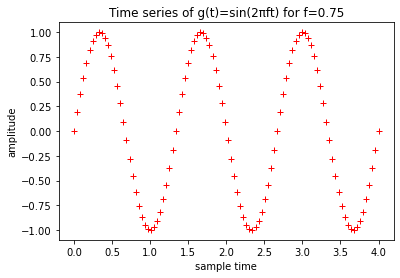

In [46]:
t=np.linspace(0,4,100)
g=np.sin(2*np.pi*t)
plt.figure()
plt.title('Time series of g(t)=sin(2πft)')
plt.xlabel('sample time')
plt.ylabel('amplitude')
plt.plot(t,g)
plt.show()

f=0.25
g2=np.sin(2*np.pi*f*t)
plt.figure()
plt.title('Time series of g(t)=sin(2πft) for f=0.25')
plt.xlabel('sample time')
plt.ylabel('amplitude')
plt.plot(t,g2,'r+')
plt.show()

f=0.75
plt.figure()
plt.title('Time series of g(t)=sin(2πft) for f=0.75')
plt.xlabel('sample time')
plt.ylabel('amplitude')
g3=np.sin(2*np.pi*f*t)
plt.plot(t,g3,'r+')
plt.show()

For the 0.25 and 0.75 sampling time series, both were not fair representations of the original time series g(t). 

The apparent frequency for the 0.25 sampling time series is: app_freq=1/100*1=1/100=0.01 Hz

The apparent frequency for the 0.75 sampling time series is:
app_freq=1/33.3=0.03 Hz

The maximum frequency f of g(t) such that it can be fairly represented is 1. 